In [1]:
# FIRST 6-critical PATTERN FOUND (p, (p+1) 1s, p)
# This worksheet is to play around with the new (potential) infinite family of 6-vert-critical circulant graphs 
# Melvin Adekanye and Ben Cameron found by mining Brendan McKay's circulant graph data.
# The sheet is very rough and care should be taken when testing for sub_search != None and sub_search == None
#
#

def circulant(n, L):

    E = []

    for i in range(n):

        for j in range(i+1, n):

            if(((i-j) % n) in L):

                if({i, j} not in E):

                    E.append({i, j})

    # Return the graph
    return E
from sage.graphs.graph_coloring import vertex_coloring
def is_kcrit(G,k):
    V = G.vertices()
    chi = G.chromatic_number()
    if(chi != k):
        return False
    
    for v in V:
        H = Graph(G) #creates local copy of G so we can delete vertices and maintain G's structure
        H.delete_vertex(v)
        if vertex_coloring(H, k=k-1, value_only=True) == False:
            return False
    return True

In [2]:
# need p>=3.
# returns the list of parameters (PATTERN) for a circulant graph on 5p+1 vertices that always appears to be 6-critical.
def potential_list(p):
    return [p] + [i for i in range(2*p, 3*p+2)] + [4*p+1]

In [3]:
for i in range(3,8):
    print(potential_list(i))

[3, 6, 7, 8, 9, 10, 13]
[4, 8, 9, 10, 11, 12, 13, 17]
[5, 10, 11, 12, 13, 14, 15, 16, 21]
[6, 12, 13, 14, 15, 16, 17, 18, 19, 25]
[7, 14, 15, 16, 17, 18, 19, 20, 21, 22, 29]


In [4]:
for p in range(3,12):
    G = Graph(circulant(5*p+1,potential_list(p)))
    print(is_kcrit(G,6))

True
True
True
True
True
True


KeyboardInterrupt: 

In [5]:
H = graphs.PathGraph(4).disjoint_union(graphs.PathGraph(1))
for p in range(3,10):
    G = Graph(circulant(5*p+1,potential_list(p)))
    sub_search = G.subgraph_search_count(H, induced=True)
    print(sub_search)

608
4452
16588
44888
100440
197948
356132


In [7]:
H = graphs.PathGraph(4).disjoint_union(Graph(2))
for p in range(3,10):
    G = Graph(circulant(5*p+1,potential_list(p)))
    sub_search = G.subgraph_search_count(H, induced=True)
    print(sub_search)

0
3108
27872
124744
396144
1019752
2275160


In [8]:
H = graphs.PathGraph(4).disjoint_union(Graph(3))
for p in range(3,10):
    G = Graph(circulant(5*p+1,potential_list(p)))
    sub_search = G.subgraph_search_count(H, induced=True)
    print(sub_search)

0
0
22152
224688
1146096
4109676
11816664


In [10]:
H = graphs.PathGraph(5)
for p in range(3,10):
    G = Graph(circulant(5*p+1,potential_list(p)))
    sub_search = G.subgraph_search_count(H, induced=True)
    print(sub_search)

864
4242
12688
29760
60120
109634
185472


**********************
starting order = 3
**********************
**********************
starting order = 4
**********************
**********************
starting order = 5
**********************


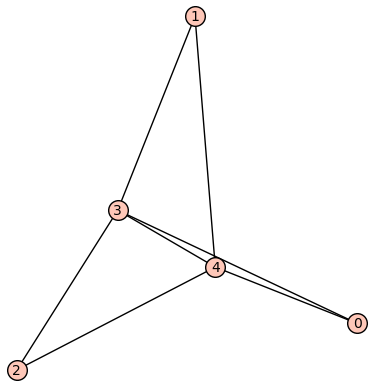

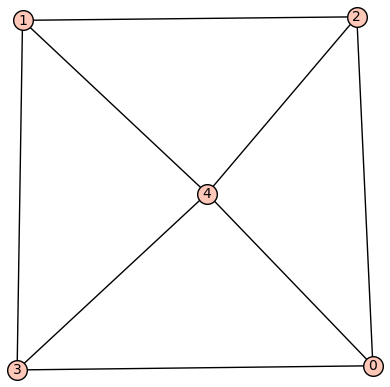

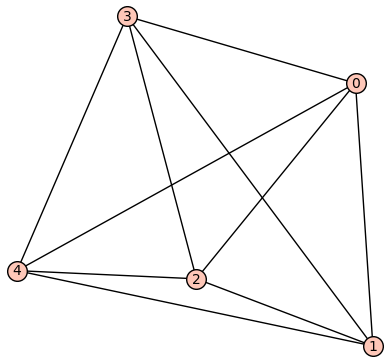

**********************
starting order = 6
**********************


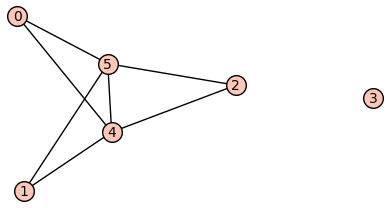

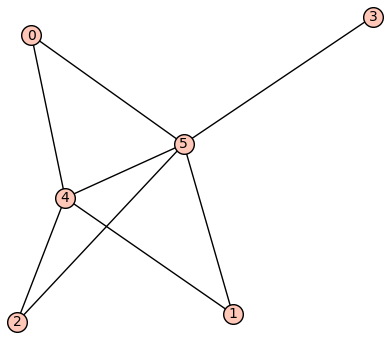

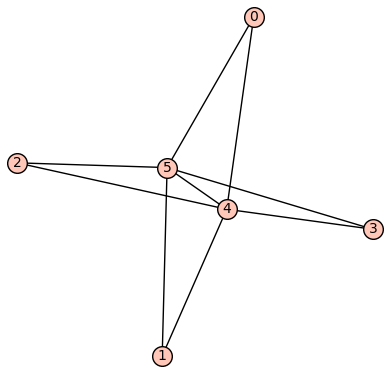

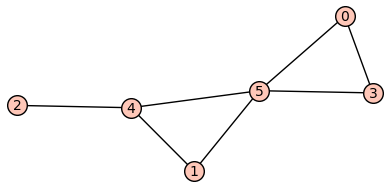

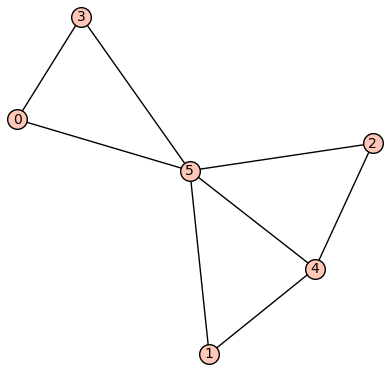

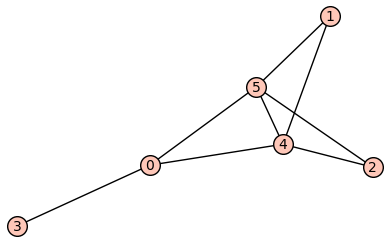

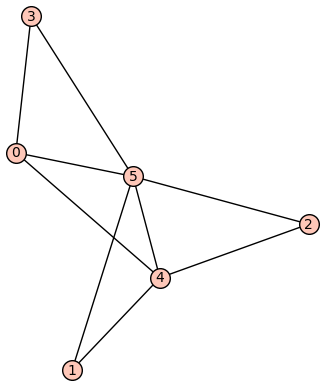

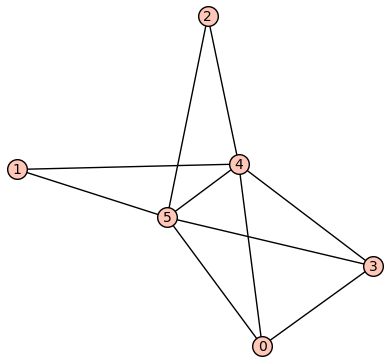

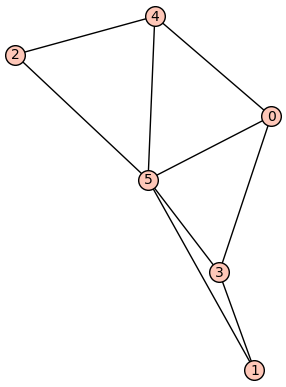

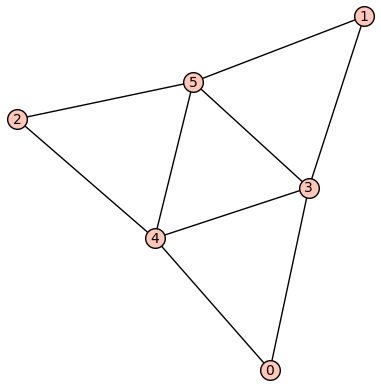

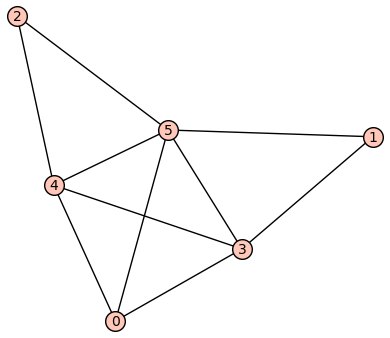

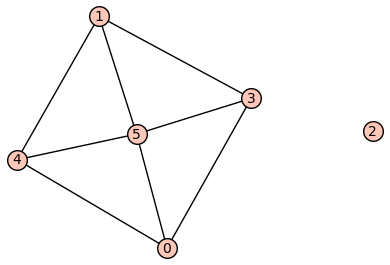

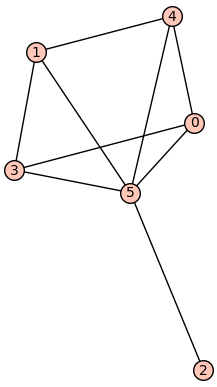

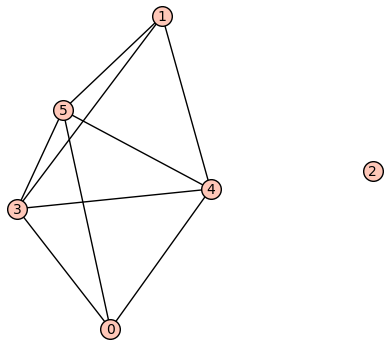

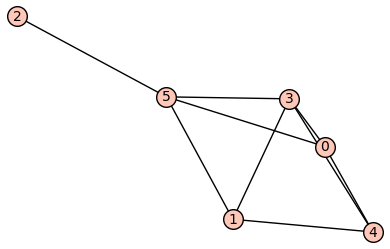

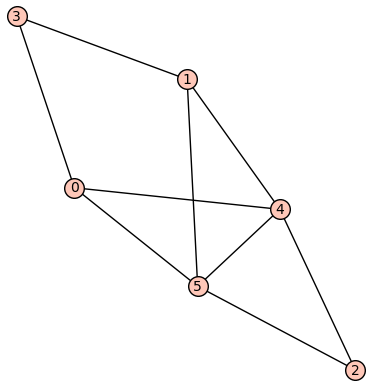

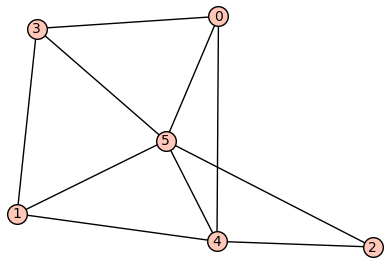

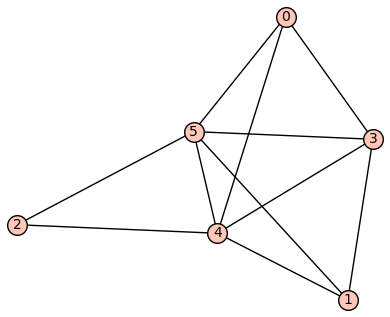

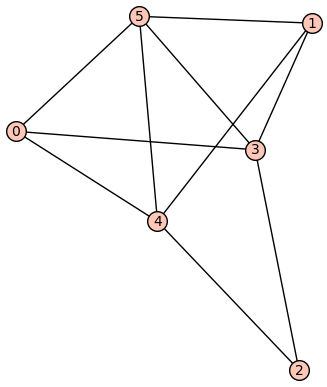

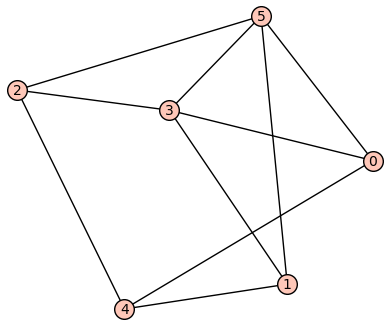

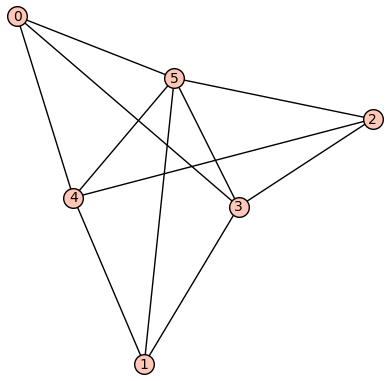

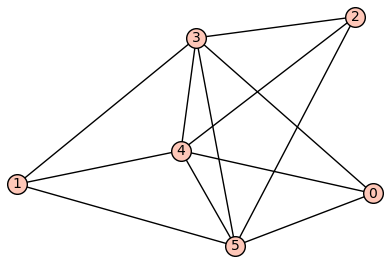

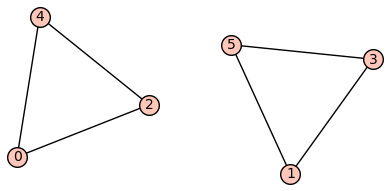

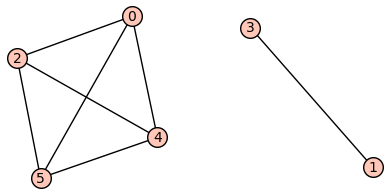

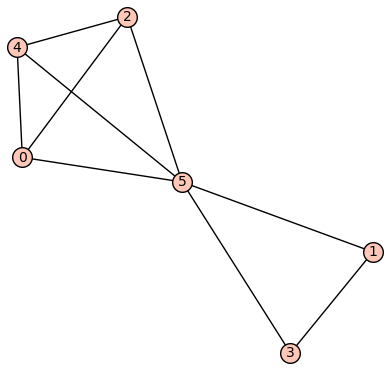

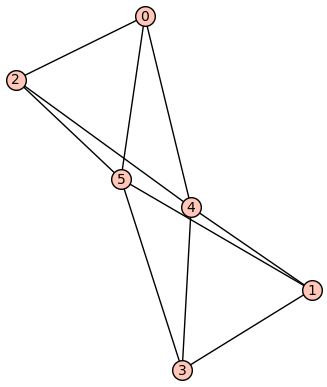

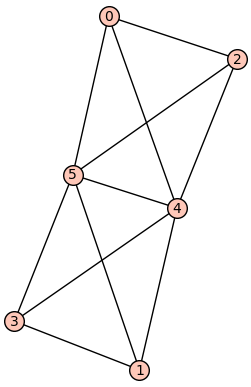

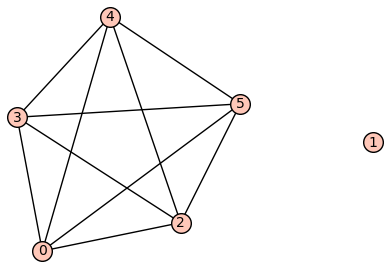

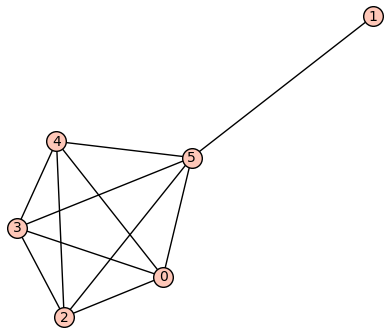

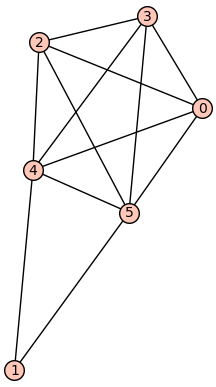

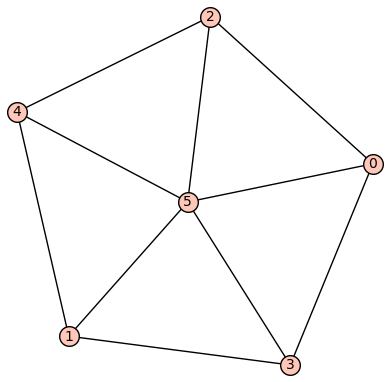

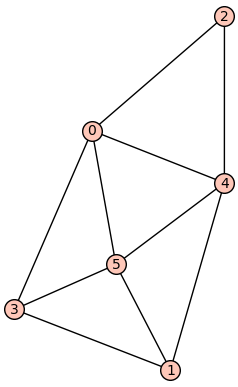

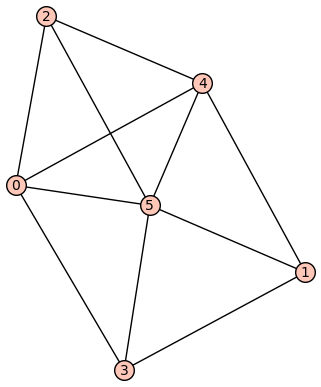

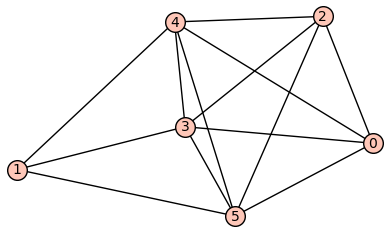

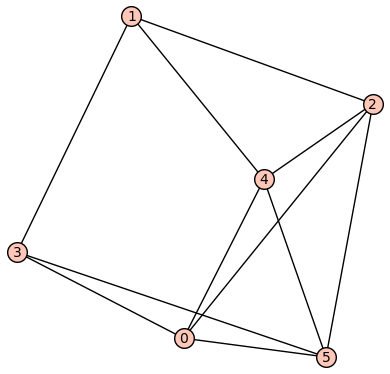

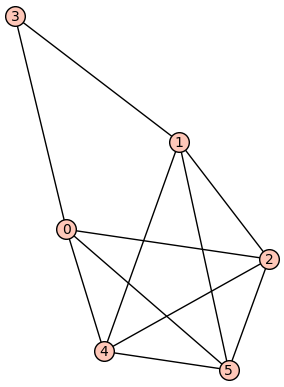

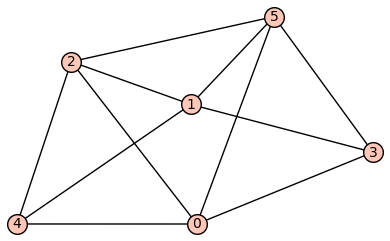

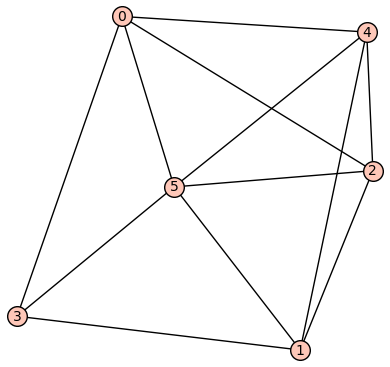

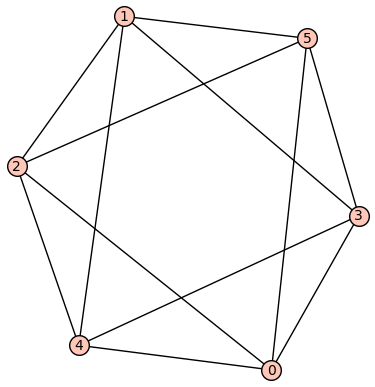

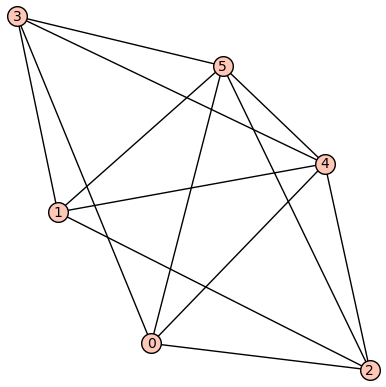

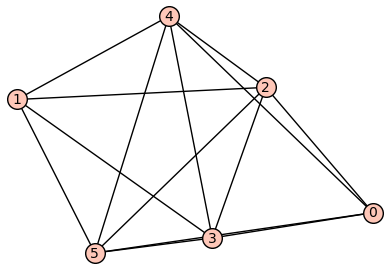

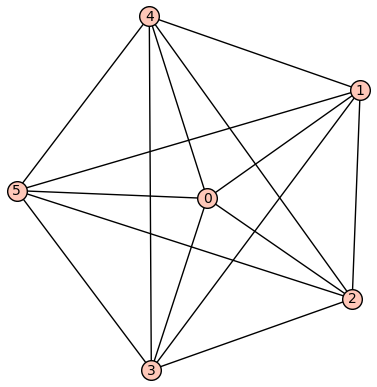

**********************
starting order = 7
**********************


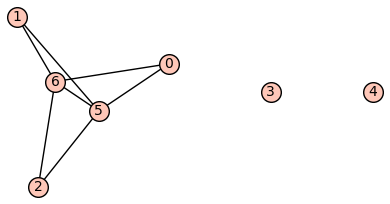

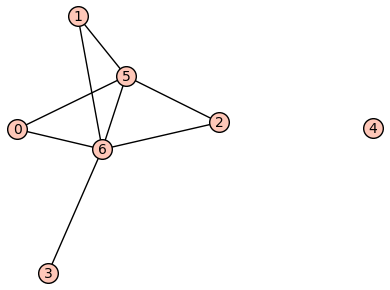

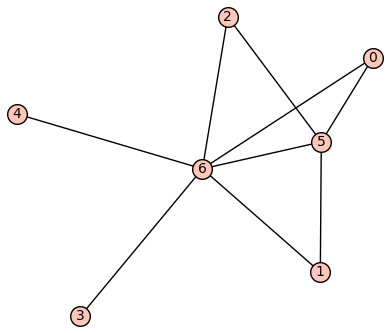

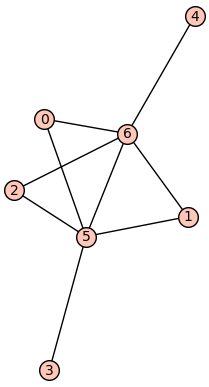

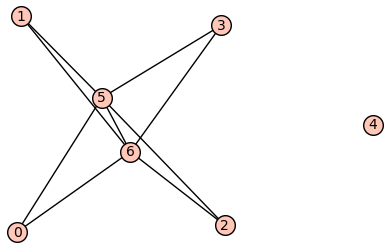

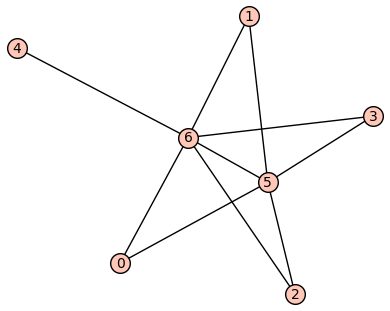

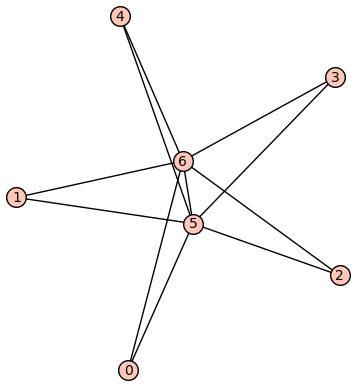

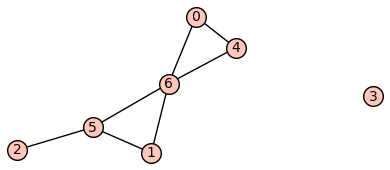

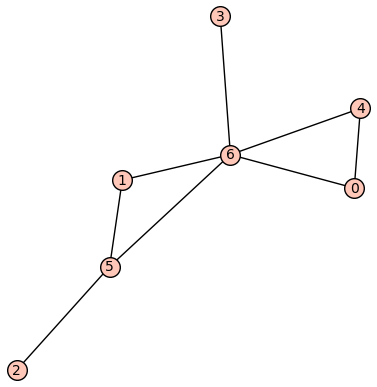

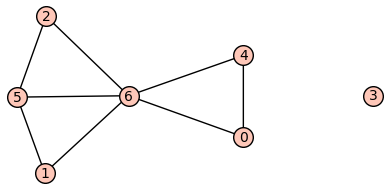

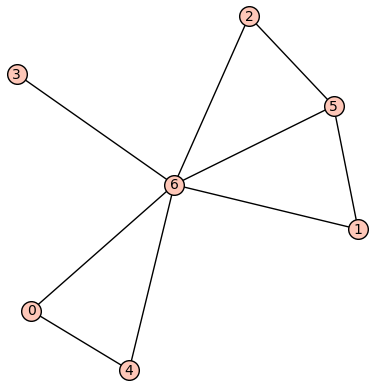

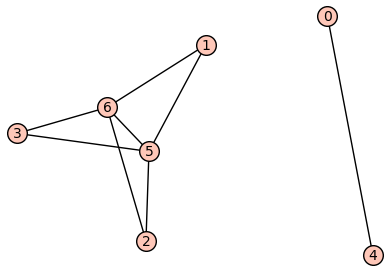

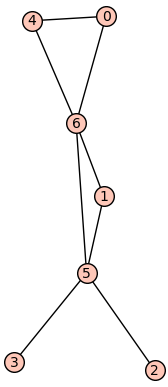

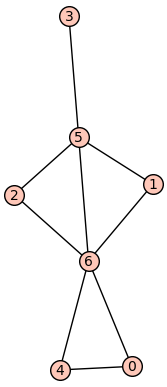

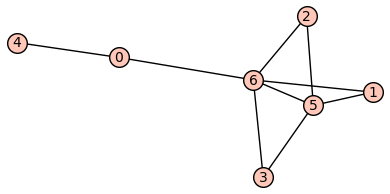

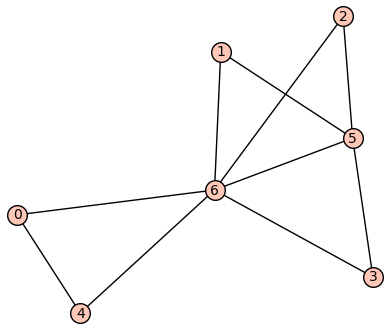

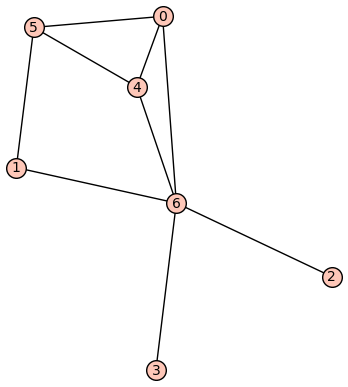

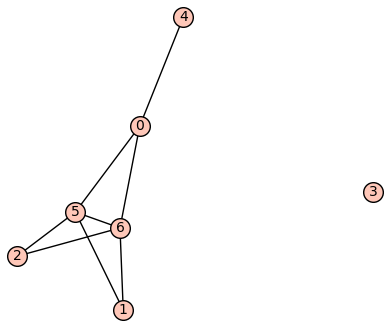

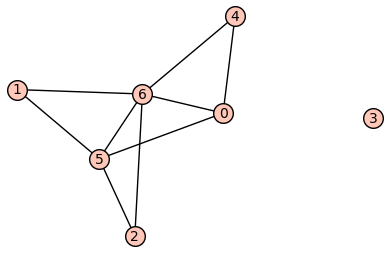

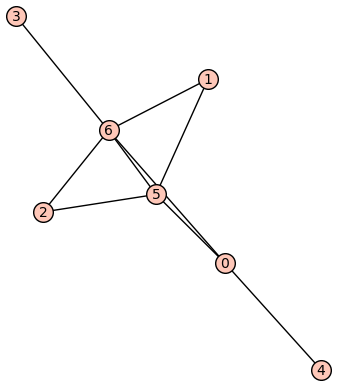

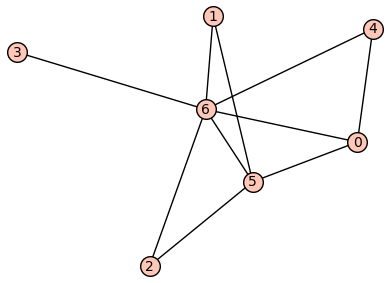

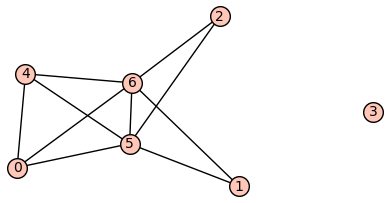

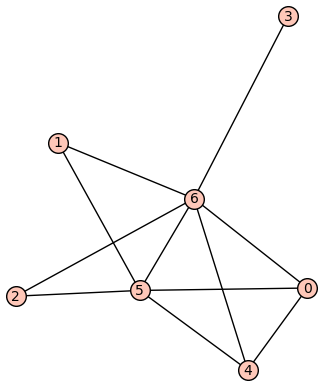

KeyboardInterrupt: 

In [9]:

path = '../Graph Data'

# bounds to loop through all graphs of min_order to max_order
min_order = 3
max_order = 7

#bounds to loop through the first 10 G(q,k) for fixed k
starting_q = 3
ending_q = 10

store_f = open('nonsubgraphs6critcirculantspattern.txt', "w")

#loops through graphs of each order
for i in range(min_order, max_order + 1):
    print("**********************")
    print('starting order = ' + str(i))
    print("**********************")

    #loop through all nonisomorphic graphs of order i (including disconnected)
    read_f = open(path+'/graph'+str(i)+'.g6.txt', "r")
    count = 0
    for line in read_f:
        count += 1
        
        H = Graph(line) #graph to test if induced subgraph

        in_sub = False #flag that will switch to True if subgraph of some value of q
        #for each order of graph, loop through some of the circulant graph of order 4q+1 with pattern 3 
        q = starting_q
        while (q in range(starting_q, ending_q + 1)) and not in_sub:
            G = Graph(circulant(5*q+1,potential_list(q)))
            sub_search = G.subgraph_search(H, induced=True)#subgraph search is used as we need isomorphic subgraphs not exact subgraphs
            #print(sub_search)
            #the H is not an induced subgraph of G if and only if the previous line returns None
            if not(sub_search == None):
                in_sub = True
            q += 1

        if not in_sub:
            H.show()
            store_f.write(line)


store_f.close()